In [1]:
import open3d as o3d
BREAST = "Manequin/Mannequin_Breast_ASCII.ply"
FASCIA = "Manequin/Mannequin_Fascia_ASCII.ply"
TORSO = "Manequin/Mannequin_Torso_ASCII.ply"
VOXEL_SIZE = 0.01


source = o3d.io.read_point_cloud(BREAST)
target = o3d.io.read_point_cloud(TORSO)

import correspondence_rigid as cr
transformation = cr.rigid_registration_manequim(source, target, VOXEL_SIZE, VOXEL_SIZE * 2, visualize_rigid_transformation=False)



[Open3D WARNING] Too few correspondences (38) after mutual filter, fall back to original correspondences.
[Open3D WARNING] Too few correspondences (2) after mutual filter, fall back to original correspondences.
[Open3D WARNING] Too few correspondences (11) after mutual filter, fall back to original correspondences.
[Open3D WARNING] Too few correspondences (1) after mutual filter, fall back to original correspondences.


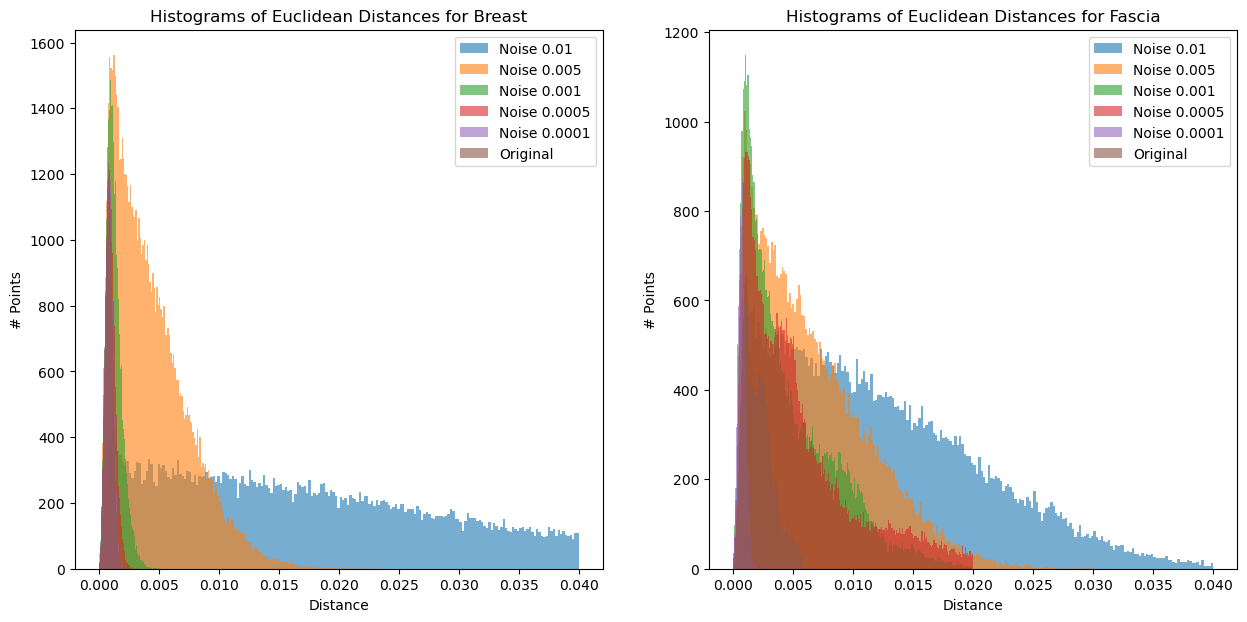

In [4]:

import correspondence_rigid as cr
import matplotlib.pyplot as plt

SIGMAS = [0.0001, 0.0005, 0.001, 0.005, 0.01]
VOXEL_SIZES_ARRAY = [0.01, 0.01, 0.01, 0.01, 0.015, 0.02] 
SOURCES_BREAST = [BREAST] + [f"Noise_ply/Breast_Noise_{sigma}.ply" for sigma in SIGMAS]
SOURCES_FASCIA = [FASCIA] + [f"Noise_ply/Fascia_Noise_{sigma}.ply" for sigma in SIGMAS]
SOURCE_TYPES = [SOURCES_BREAST, SOURCES_FASCIA]
NAMES_TYPES_SOURCES = ["Breast", "Fascia"]

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

for j, source_type in enumerate(SOURCE_TYPES):
    all_histograms = []
    all_bins = []

    for i, idx in enumerate(source_type):
        hist, bins = cr.manequim_correspondences_histogram_distances(idx, TORSO, VOXEL_SIZES_ARRAY[i], display_histogram=False)
        
        all_histograms.append(hist)
        all_bins.append(bins)

    all_histograms = all_histograms[::-1]
    all_bins = all_bins[::-1]

    for bins, histogram in zip(all_bins, all_histograms):
        axs[j].hist(bins[:-1], weights=histogram, bins=bins, alpha=0.6) # Plot each histogram with transparency and reversed order

    names = [f"Original", "Noise 0.0001", "Noise 0.0005", "Noise 0.001", "Noise 0.005", "Noise 0.01"]
    axs[j].set_xlabel('Distance')
    axs[j].set_ylabel('# Points')
    axs[j].set_title(f'Histograms of Euclidean Distances for {NAMES_TYPES_SOURCES[j]}')
    axs[j].legend(names[::-1])  # Add legend with labels for each histogram

plt.show()


In [3]:
import correspondence_rigid as cr
cr.plot_manequim_correspondences(BREAST, TORSO, VOXEL_SIZE)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


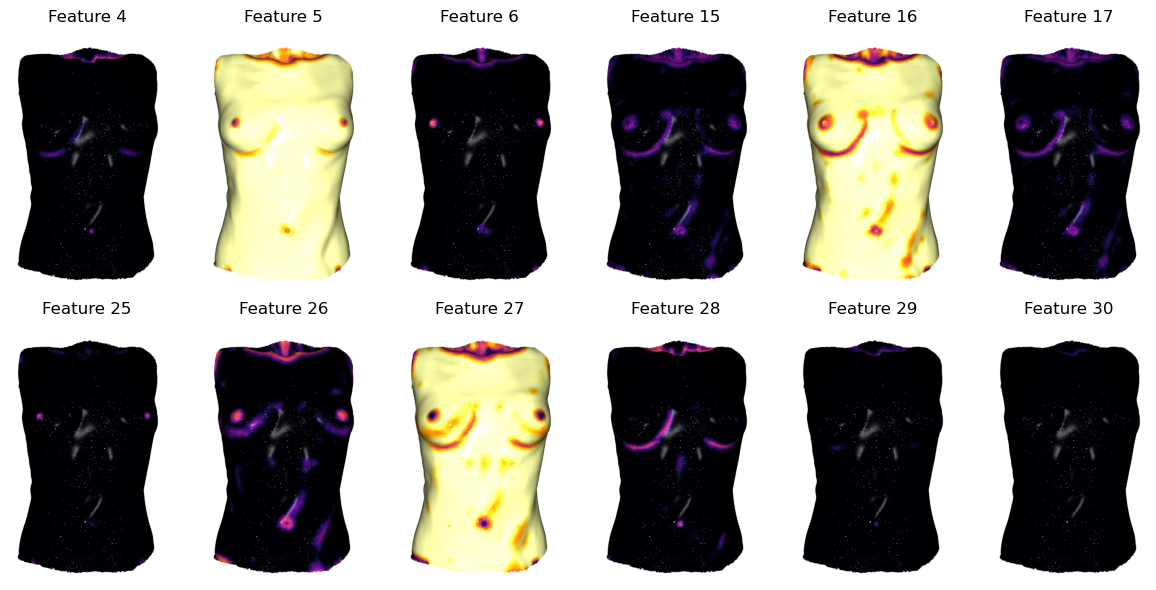

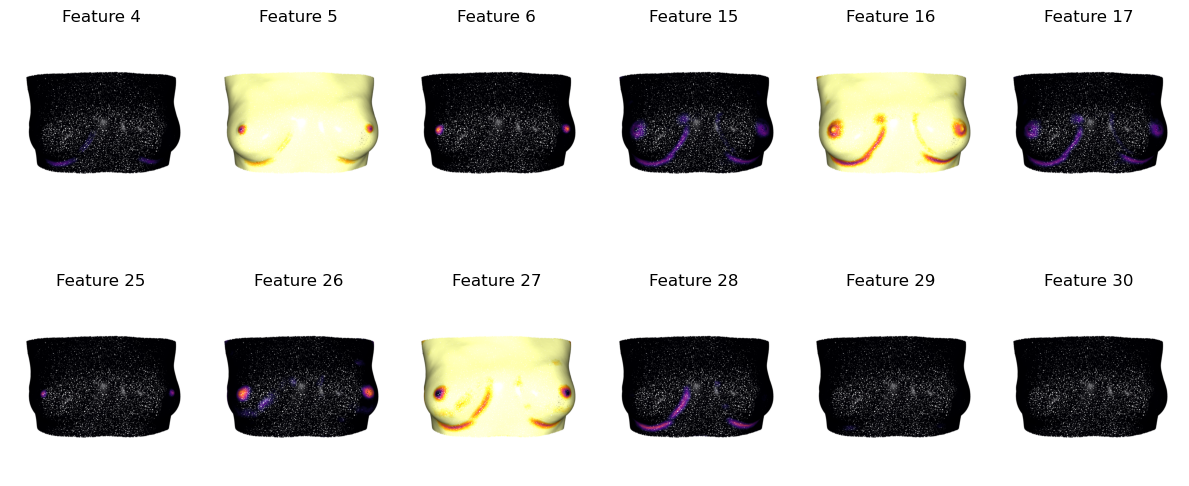

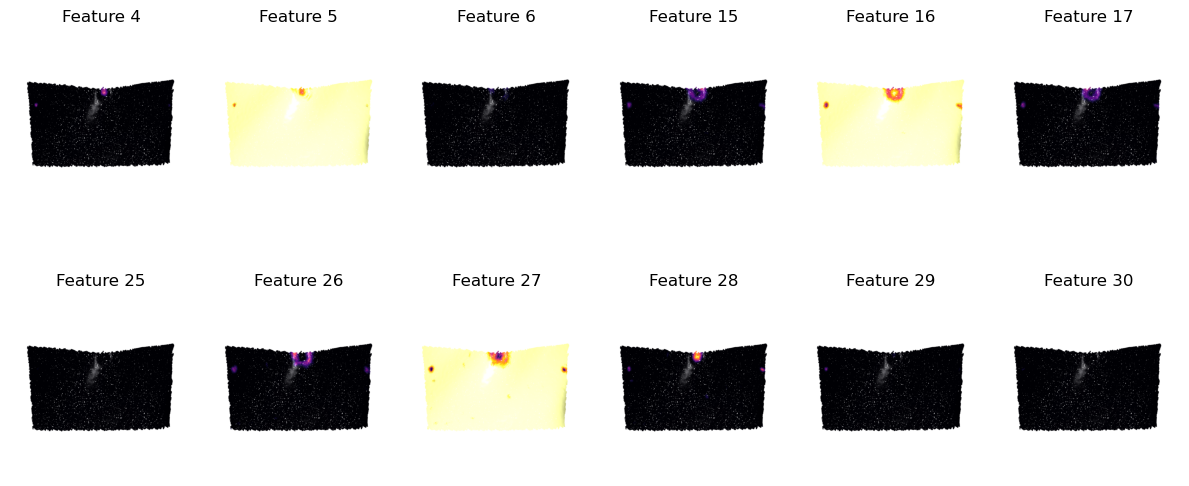

In [18]:
'''
Point cloud with inferno displaying features in open3d visualizer 
'''
import features_explore

# features_explore.save_features(TORSO, "torso", "Features", VOXEL_SIZE, capture_screen=False)
# features_explore.save_features(BREAST, "breast", "Features", VOXEL_SIZE, capture_screen=False)
# features_explore.save_features(FASCIA, "fascia", "Features", VOXEL_SIZE, capture_screen=False)

'''
Point cloud with inferno displaying features in cell output
'''

features_explore.see_features("Features", "torso", 2, 6, [4,5,6,15,16,17, 25, 26, 27, 28, 29, 30])
features_explore.see_features("Features", "breast", 2, 6, [4,5,6,15,16,17, 25, 26, 27, 28, 29, 30])
features_explore.see_features("Features", "fascia", 2, 6, [4,5,6,15,16,17, 25, 26, 27, 28, 29, 30])

In [4]:
import rigid_add_noise as noise
import correspondence_rigid as cr

mu, sigma = 0, 0.001 

folder = "Noise_ply"
filename = f"Breast_Noise_{sigma}"

# See the noisy one
source_noisy = noise.apply_noise(source, mu, sigma)

# Save the previous point cloud
# noise.save_ply(source_noisy, folder, filename)

transformation = cr.rigid_registration_manequim(source_noisy, target, VOXEL_SIZE, VOXEL_SIZE * 2, visualize_rigid_transformation=True)


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
